<a href="https://colab.research.google.com/github/mahaairshad-shu/MechanicsPython2025/blob/main/Week%204/Wk4_Sess2_AI_for_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![SHU](https://drive.google.com/uc?export=view&id=1oauWClN3B2tjg1AeVHtfjAXZg13d9HXL)

#**Modelling Mechanics of Sports Engineering**
##Week 4
###Session 2: AI-assisted coding - Best practices


<a target="_blank" href="https://github.com/mahaairshad-shu/MechanicsPython2025">
  <img alt="Link to GitHub" src="https://img.shields.io/badge/link_to-GitHub_repo-blue?logo=github&labelColor=black">

</a><a target="_blank" href="https://shuspace.shu.ac.uk/ultra/courses/_355862_1/outline">
  <img alt="Access course folder" src="https://img.shields.io/badge/access_course_files-Folder-yellow">
</a>

✅ **Note: Make sure the AI assistant is turned ON! You heard that right!**

*Tools> Settings> AI assistance> Hide generative AI features> uncheck*

* Keep saving your changes! ***Ctrl+S***   all the way!

Download the csv on the link locally.

The file is available on the following public drive link. It has been imported in this notebook for your ease.


</a><a target="_blank" href="https://drive.google.com/file/d/18flGuhE2rfisV6PlA5826p189jVbPr6b/view?usp=drive_link">
  <img alt="Access csv file" src="https://img.shields.io/badge/access_csv_file-Drive_link-yellow">
</a>

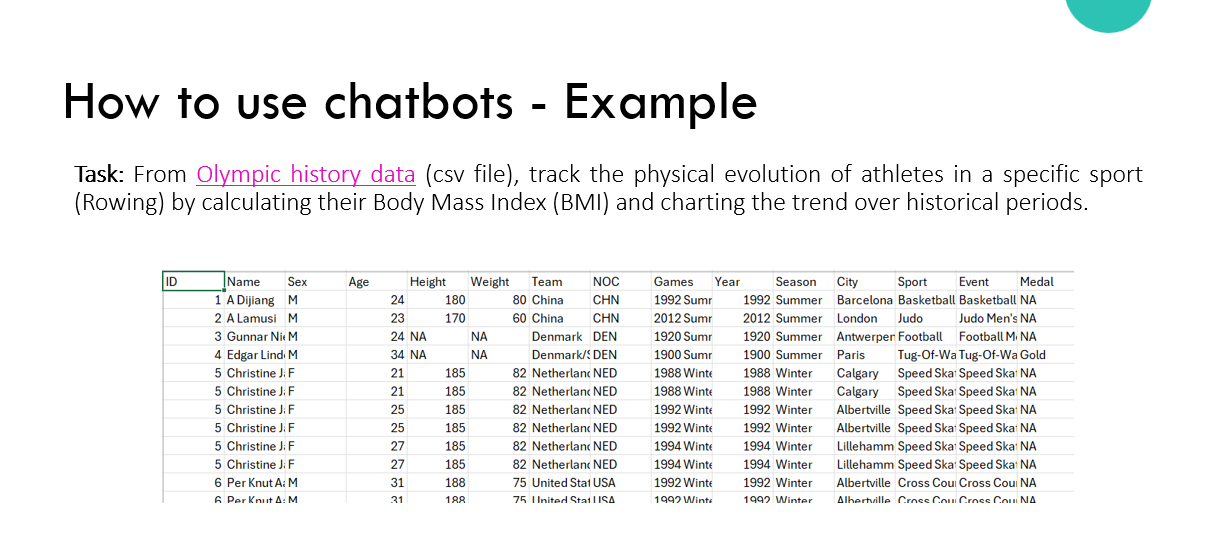

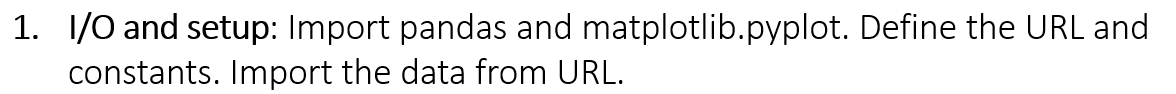

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

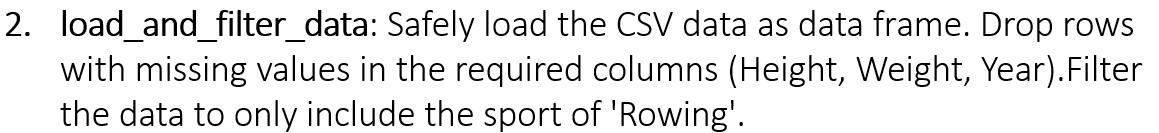

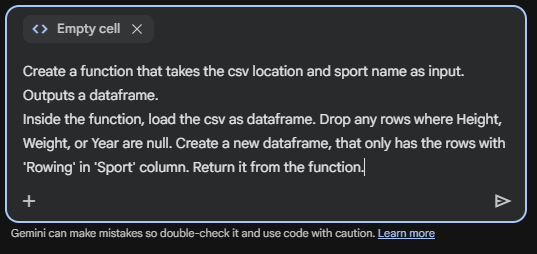

In [ ]:
def process_sport_data(csv_location, sport_name):
    # Load the csv as a dataframe
    df = pd.read_csv(csv_location)

    # Drop any rows where Height, Weight, or Year are null
    df_cleaned = df.dropna(subset=['Height', 'Weight', 'Year'])

    # Create a new dataframe that only has the rows with the specified sport
    sport_df = df_cleaned[df_cleaned['Sport'] == sport_name]

    return sport_df


In [ ]:
rowingDF = process_sport_data('/content/athlete_events (1).csv', 'Rowing')
rowingDF

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN
218,106,Agostino Abbagnale,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271047,135545,Henk Jan Zwolle,M,23.0,197.0,93.0,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Single Sculls,NaN
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


Verify

In [ ]:
df = pd.read_csv('/content/athlete_events (1).csv')
# count number of rows with 'Sport' column with value 'Rowing' and Height, Weight Year with non-null values
df[(df['Sport'] == 'Rowing') & (df['Height'].notnull() & df['Weight'].notnull() & df['Year'].notnull())].shape[0]

7794

In [ ]:
len(rowingDF)

7794

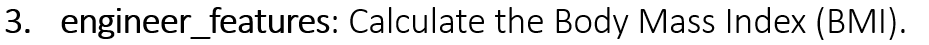

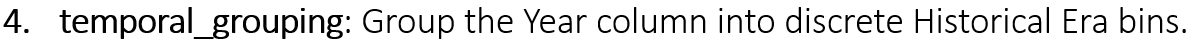

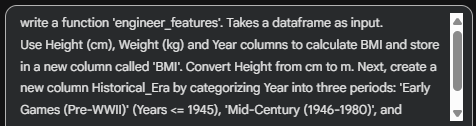

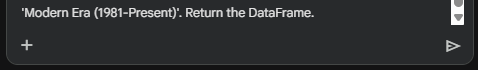

In [ ]:
def engineer_features(df):
    # Convert Height from cm to m
    df['Height_m'] = df['Height'] / 100

    # Calculate BMI: Weight (kg) / (Height (m))^2
    df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

    # Create 'Historical_Era' column
    df['Historical_Era'] = pd.cut(df['Year'],
                                  bins=[0, 1945, 1980, df['Year'].max()],
                                  labels=['Early Games (Pre-WWII)', 'Mid-Century (1946-1980)', 'Modern Era (1981-Present)'],
                                  right=True)

    # Drop the temporary 'Height_m' column if it's not needed
    df = df.drop(columns=['Height_m'])

    return df

In [ ]:
rowingDFEngFeatures = engineer_features(rowingDF)
rowingDFEngFeatures

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,Historical_Era
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,20.156211,Modern Era (1981-Present)
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN,20.156211,Modern Era (1981-Present)
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,22.956841,Modern Era (1981-Present)
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN,22.038401,Modern Era (1981-Present)
218,106,Agostino Abbagnale,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold,27.161612,Modern Era (1981-Present)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271047,135545,Henk Jan Zwolle,M,23.0,197.0,93.0,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Single Sculls,NaN,23.963514,Modern Era (1981-Present)
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,23.963514,Modern Era (1981-Present)
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,23.963514,Modern Era (1981-Present)
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,21.499597,Modern Era (1981-Present)


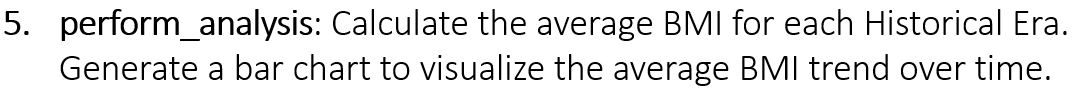

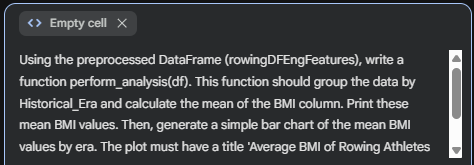

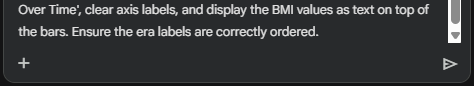

Mean BMI by Historical Era:
Historical_Era
Early Games (Pre-WWII)       23.325117
Mid-Century (1946-1980)      23.621845
Modern Era (1981-Present)    23.326161
Name: BMI, dtype: float64


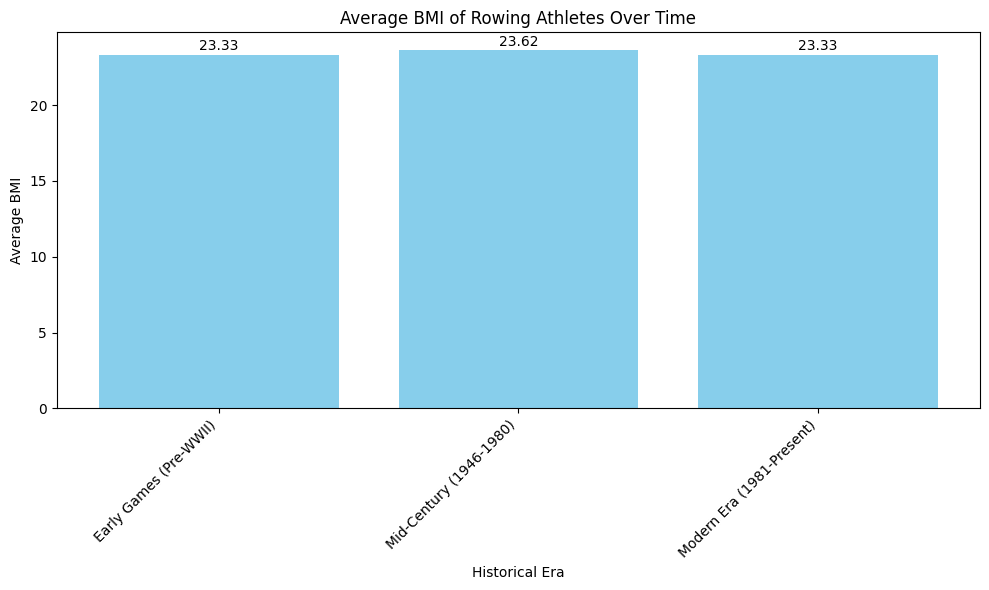

In [ ]:
def perform_analysis(df):
    # Group by Historical_Era and calculate the mean of BMI
    mean_bmi_by_era = df.groupby('Historical_Era', observed=False)['BMI'].mean()

    # Print the mean BMI values
    print("Mean BMI by Historical Era:")
    print(mean_bmi_by_era)

    # Generate a bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(mean_bmi_by_era.index.astype(str), mean_bmi_by_era.values, color='skyblue')

    # Add title and labels
    plt.title('Average BMI of Rowing Athletes Over Time')
    plt.xlabel('Historical Era')
    plt.ylabel('Average BMI')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

    # Display BMI values as text on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Call the function with the preprocessed DataFrame
perform_analysis(rowingDFEngFeatures)